# 🧠 Customer Churn Prediction - Student Practice Notebook
Welcome to the customer churn prediction notebook. In this exercise, you'll explore data about customer behavior and build a model to predict whether a customer will leave (churn) or stay.

## 📁 1. Load the Dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
Customer_data = pd.read_csv('customer_Leave_or_Stay.csv')

# Display the first few rows of the dataset
print(Customer_data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## 🔍 2. Dataset Overview


In [3]:
# Understand the structure and types of data working with.

print("Structure of the dataset")
print(Customer_data.info())

print("\nStatistical summary of the dataset")
print(Customer_data.describe())

Structure of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Statistical summary of the dataset
         RowNumber    Custom

## 📊 3. Exploratory Data Analysis (EDA)

In [4]:
# Check for missing values and duplicates
missing_values = Customer_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

Duplicate_Rows = Customer_data.duplicated().sum()
print(f"\nNumber of duplicate rows in the dataset: {Duplicate_Rows}")


Missing values in each column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Number of duplicate rows in the dataset: 0


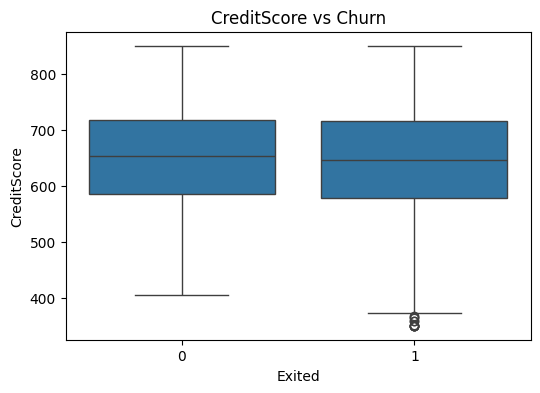

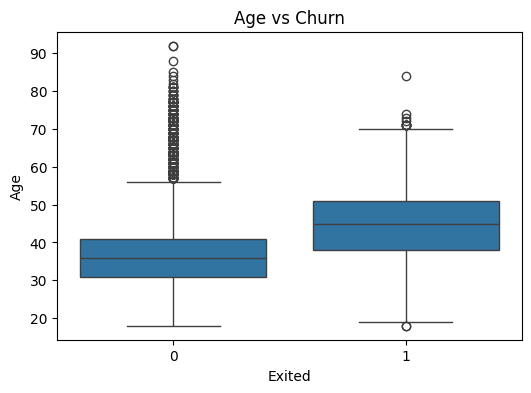

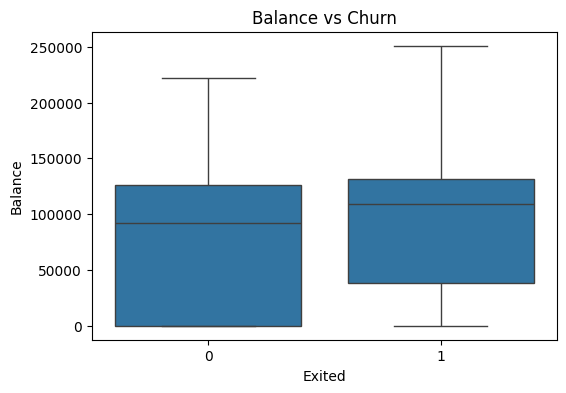

C:\Users\mital\AppData\Local\Temp\ipykernel_5344\827905847.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Customer_data, x='Age', hue='Exited', shade=True)


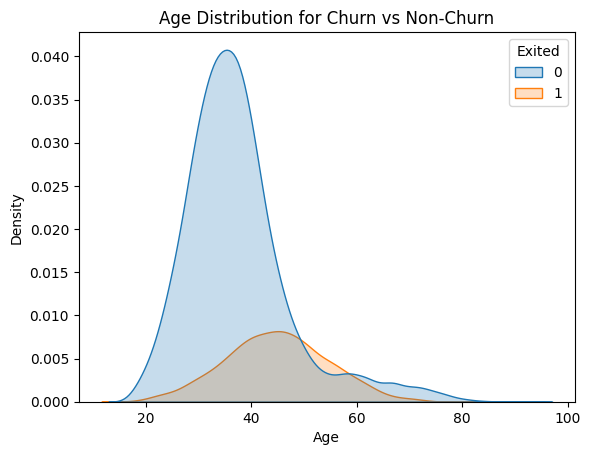

In [5]:
# Visualize key relationships and distributions.

# CreditScore vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=Customer_data, x='Exited', y='CreditScore')
plt.title('CreditScore vs Churn')
plt.show()

# Age vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=Customer_data, x='Exited', y='Age')
plt.title('Age vs Churn')
plt.show()

# Balance vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=Customer_data, x='Exited', y='Balance')
plt.title('Balance vs Churn')
plt.show()

# KDE Density Plot for comparison
sns.kdeplot(data=Customer_data, x='Age', hue='Exited', shade=True)
plt.title('Age Distribution for Churn vs Non-Churn')
plt.show()



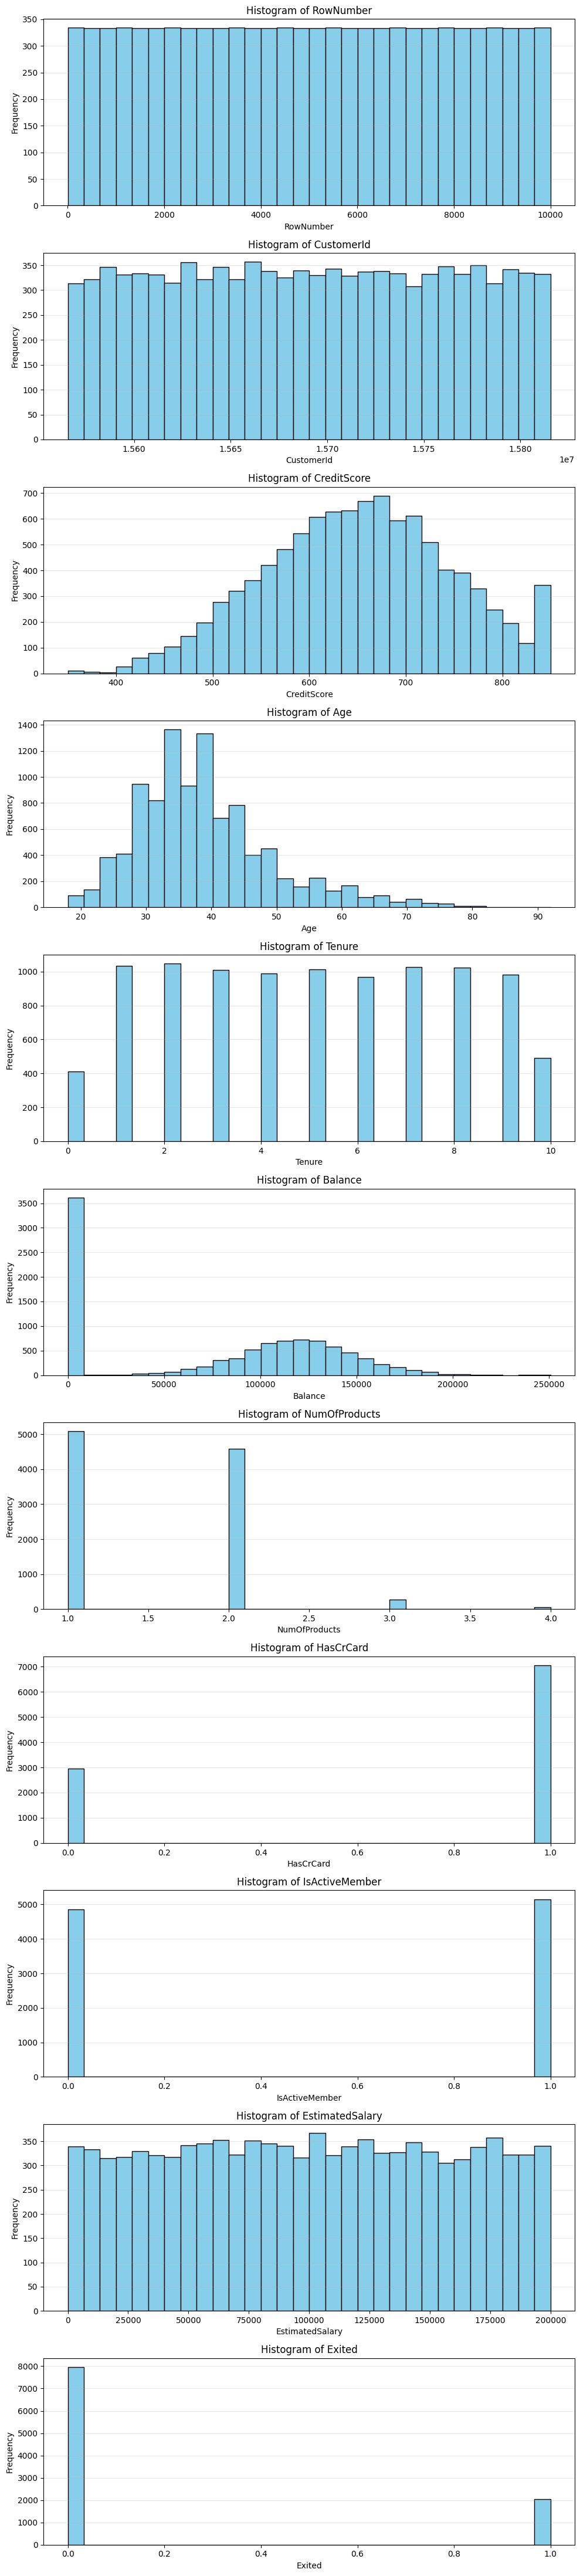

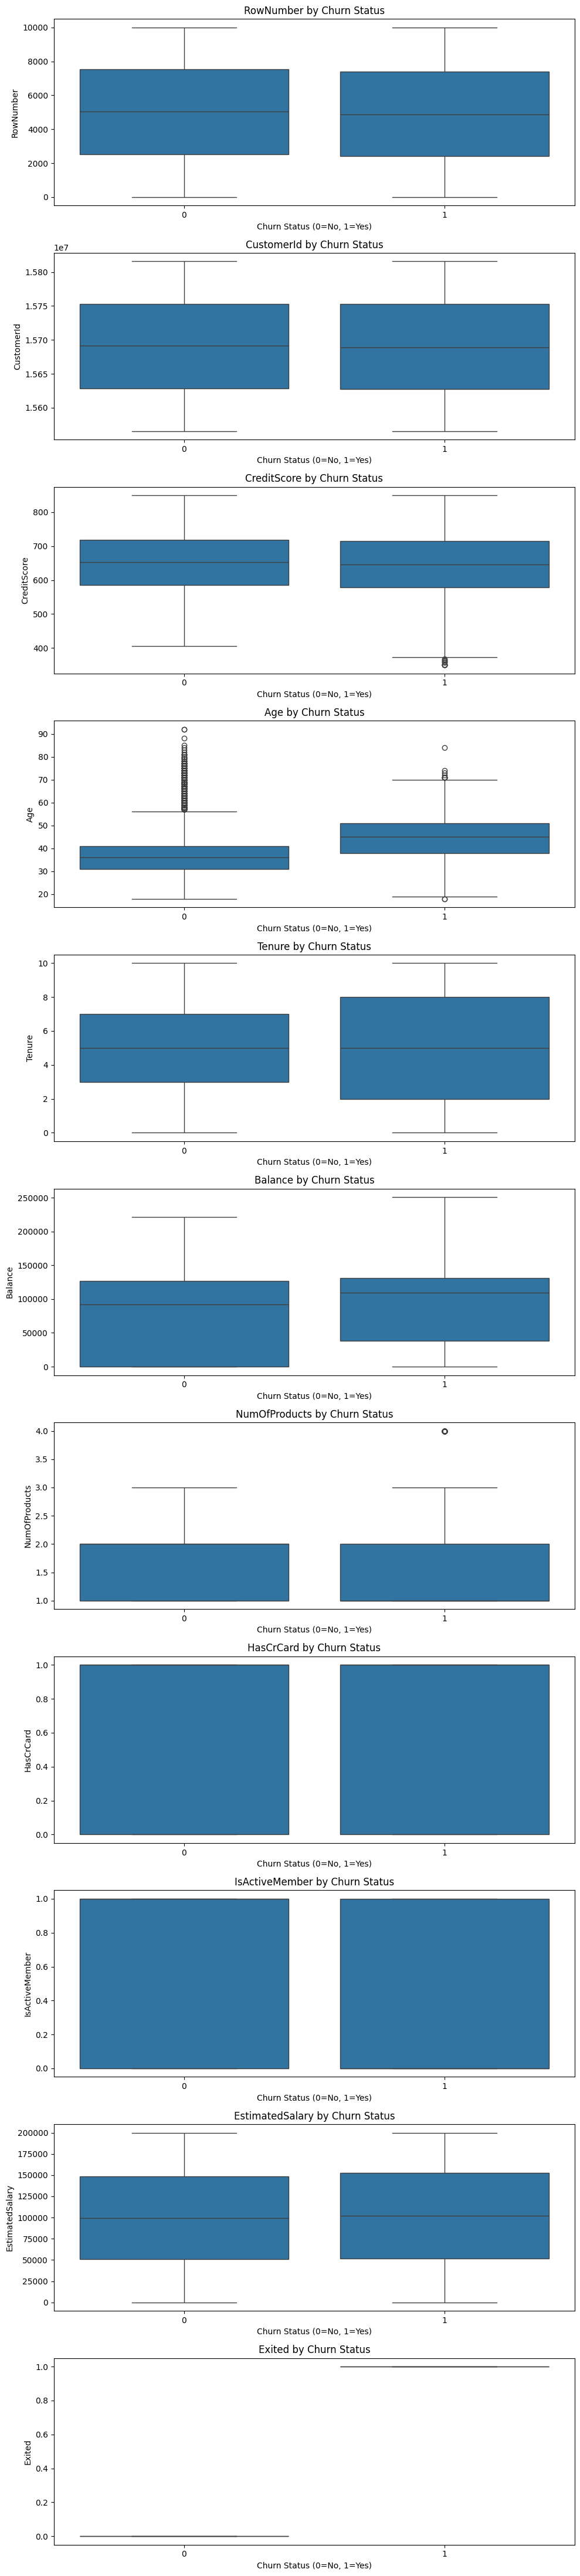

In [6]:
# Get all numeric columns
numeric_cols = Customer_data.select_dtypes(include=[np.number]).columns.tolist()

# Plot Histograms for all numeric columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 4*len(numeric_cols)))

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(Customer_data[col], bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Histogram of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



# Boxplots by Churn Status (Exited)
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 4*len(numeric_cols)))

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=Customer_data, x='Exited', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status')
    axes[idx].set_xlabel('Churn Status (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

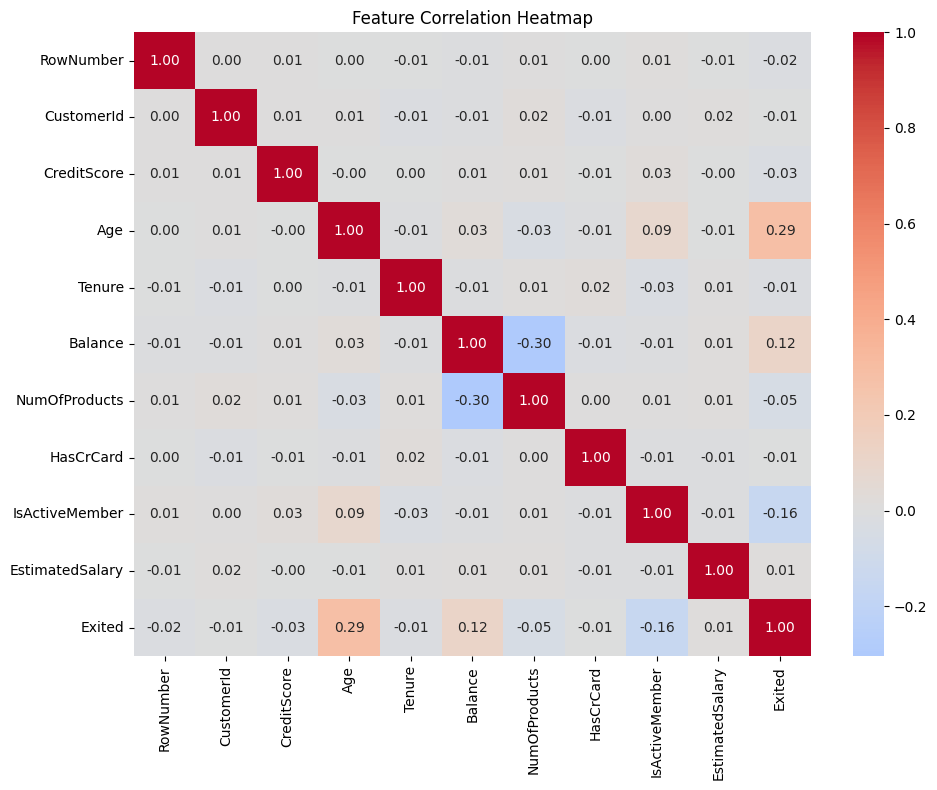

In [7]:
# Correlation heatmap for numeric columns
numeric_data = Customer_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

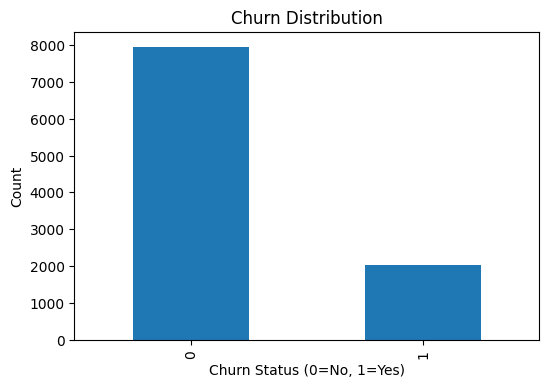

<Figure size 800x500 with 0 Axes>

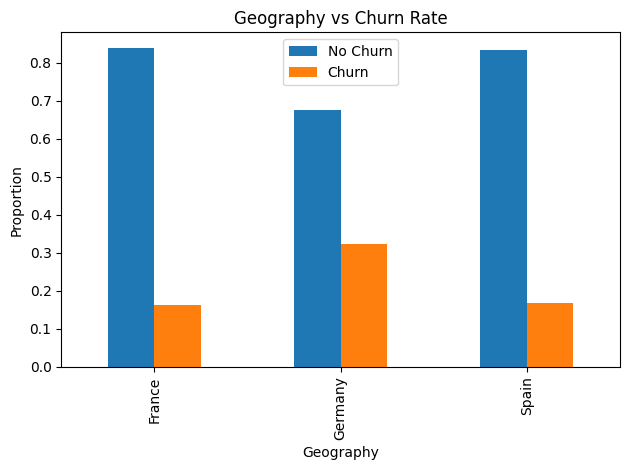

<Figure size 800x500 with 0 Axes>

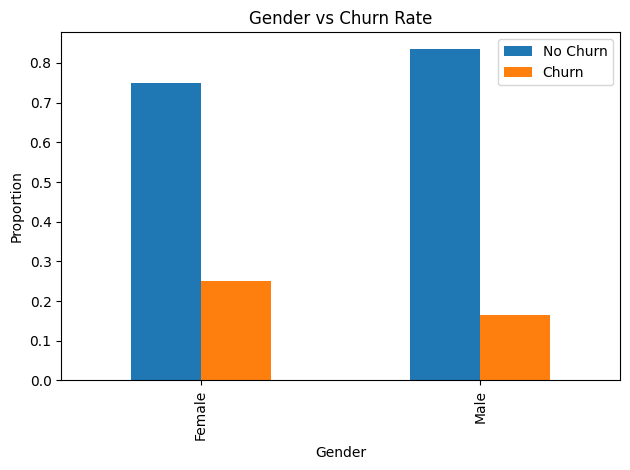

In [8]:
# 1. Churn Distribution (Class Balance)
plt.figure(figsize=(6, 4))
Customer_data['Exited'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# 2. Categorical Features vs Churn
categorical_cols = ['Geography', 'Gender']  # adjust to your actual columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    pd.crosstab(Customer_data[col], Customer_data['Exited'], normalize='index').plot(kind='bar')
    plt.title(f'{col} vs Churn Rate')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.legend(['No Churn', 'Churn'])
    plt.tight_layout()
    plt.show()

## Key findings from above EDA:

1. Class Imbalance: 80% No Churn vs 20% Churn - significant class imbalance detected
2. Age is Critical: Churned customers are significantly older - strong predictor for churn
3. Geographic Variation: Germany has 32% churn rate vs France/Spain (15-17%) - Geography is important
4. Gender Matters: Females have 25% churn rate vs Males 16% - Gender is a meaningful feature
5. Weak Predictors: Credit Score and Balance show minimal difference between churned/non-churned customers - lower   predictive power



## 🧼 4. Data Preprocessing

Clean the data and prepare it for training.

In [9]:
# Log transform Balance
Customer_data['Balance_log'] = np.log1p(Customer_data['Balance'])

# One-hot encode with drop_first=True (avoids multicollinearity)
# France & Female are encoded as 0,0 and 0 respectively (implicit)
Customer_data = pd.get_dummies(Customer_data, columns=['Geography', 'Gender'], drop_first=True)

# Convert boolean to int (optional cleanup)
bool_cols = ['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'HasCrCard', 'IsActiveMember']
for col in bool_cols:
    Customer_data[col] = Customer_data[col].astype(int)


# Drop irrelevant columns
Customer_data = Customer_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Balance'], axis=1)



## ✂️ 5. Train-Test Split
Separate your data into features and target, then split into training and test sets.

In [21]:
# Split data
X = Customer_data.drop('Exited', axis=1)
y = Customer_data['Exited']
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
robust_scaler = RobustScaler()
cols_robust = ['Age', 'CreditScore']
X_train_cv[cols_robust] = robust_scaler.fit_transform(X_train_cv[cols_robust])
X_test_cv[cols_robust] = robust_scaler.transform(X_test_cv[cols_robust])

standard_scaler = StandardScaler()
cols_standard = ['Balance_log', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
X_train_cv[cols_standard] = standard_scaler.fit_transform(X_train_cv[cols_standard])
X_test_cv[cols_standard] = standard_scaler.transform(X_test_cv[cols_standard])


##  6. Model Training, Tuning & Evaluation
Train 4 models, select best performer, optimize hyperparameters, and evaluate final results.

 Baseline Model Comparison (5-Fold CV with SMOTE in each fold)

Training Logistic Regression...

  Logistic Regression - Cross-Validation Results:
    F1-Score:  0.4781 (+/- 0.0198)
    ROC-AUC:   0.7566 (+/- 0.0241)
    Precision: 0.3765 (+/- 0.0132)
    Recall:    0.6552 (+/- 0.0368)
    Accuracy:  0.7089 (+/- 0.0084)

Training Random Forest...

  Random Forest - Cross-Validation Results:
    F1-Score:  0.5981 (+/- 0.0286)
    ROC-AUC:   0.8414 (+/- 0.0143)
    Precision: 0.5926 (+/- 0.0175)
    Recall:    0.6049 (+/- 0.0461)
    Accuracy:  0.8349 (+/- 0.0081)

Training Gradient Boosting...

  Gradient Boosting - Cross-Validation Results:
    F1-Score:  0.6105 (+/- 0.0186)
    ROC-AUC:   0.8539 (+/- 0.0111)
    Precision: 0.5739 (+/- 0.0131)
    Recall:    0.6528 (+/- 0.0320)
    Accuracy:  0.8305 (+/- 0.0063)

Training XGBoost...

  XGBoost - Cross-Validation Results:
    F1-Score:  0.5833 (+/- 0.0348)
    ROC-AUC:   0.8382 (+/- 0.0137)
    Precision: 0.6240 (+/- 0.0355)
    Recall:

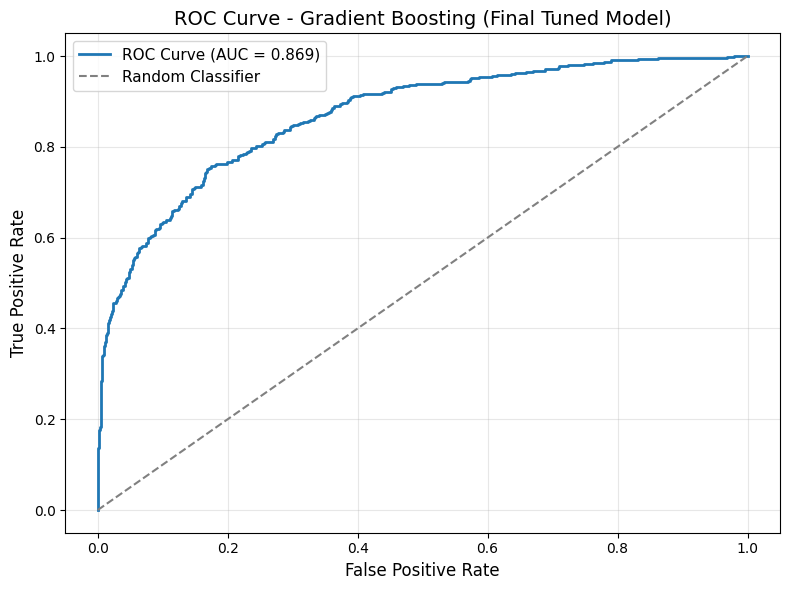


✅ Model Training, Tuning, and Evaluation Complete!


In [23]:

from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, roc_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



# Baseline Model Comparison using 5-Fold Cross-Validation

print("=" * 70)
print(" Baseline Model Comparison (5-Fold CV with SMOTE in each fold)")
print("=" * 70)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, verbosity=0)
}

cv_results = {}
results_summary = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create pipeline with SMOTE inside (applied only on training folds)
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])
    
    # Cross-validate with multiple metrics
    scores = cross_validate(
        pipeline, X_train_cv, y_train_cv, 
        cv=cv,
        scoring=['f1', 'roc_auc', 'precision', 'recall', 'accuracy'],
        return_train_score=False,
        n_jobs=-1
    )
    
    cv_results[name] = scores
    
    # Print results for this model
    print(f"\n  {name} - Cross-Validation Results:")
    print(f"    F1-Score:  {scores['test_f1'].mean():.4f} (+/- {scores['test_f1'].std():.4f})")
    print(f"    ROC-AUC:   {scores['test_roc_auc'].mean():.4f} (+/- {scores['test_roc_auc'].std():.4f})")
    print(f"    Precision: {scores['test_precision'].mean():.4f} (+/- {scores['test_precision'].std():.4f})")
    print(f"    Recall:    {scores['test_recall'].mean():.4f} (+/- {scores['test_recall'].std():.4f})")
    print(f"    Accuracy:  {scores['test_accuracy'].mean():.4f} (+/- {scores['test_accuracy'].std():.4f})")
    
    results_summary.append({
        'Model': name,
        'F1': scores['test_f1'].mean(),
        'ROC-AUC': scores['test_roc_auc'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'Accuracy': scores['test_accuracy'].mean()
    })

# Print summary table
print("\n" + "=" * 70)
print("SUMMARY TABLE - All Models")
print("=" * 70)
summary_df = pd.DataFrame(results_summary)
print(summary_df.to_string(index=False))

# Select best model by F1-score (change to 'ROC-AUC' or 'Recall' if needed)
best_model_name = max(cv_results, key=lambda x: cv_results[x]['test_f1'].mean())
print(f"\n{'=' * 70}")
print(f"🏆 Best Model Selected (by F1-Score): {best_model_name}")
print(f"{'=' * 70}\n")



# Hyperparameter Tuning for Best Model using GridSearchCV

print("Hyperparameter Tuning for Best Model")
print("=" * 70)

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'clf__C': [0.001, 0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2'],
        'clf__class_weight': [None, 'balanced']
    },
    'Random Forest': {
        'clf__n_estimators': [50, 100, 150],
        'clf__max_depth': [5, 10, 15, None],
        'clf__min_samples_split': [2, 5, 10],
        'clf__class_weight': [None, 'balanced']
    },
    'Gradient Boosting': {
        'clf__n_estimators': [50, 100, 150],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__max_depth': [3, 5, 7],
        'clf__subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'clf__n_estimators': [50, 100, 150],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__max_depth': [3, 5, 7],
        'clf__scale_pos_weight': [1, 3, 5]
    }
}

# Get best model instance and parameter grid
best_model_instance = models[best_model_name]
param_grid = param_grids[best_model_name]

print(f"\nTuning hyperparameters for: {best_model_name}")
print(f"Parameter combinations to test: {len(param_grid)}")

# Create pipeline with best model
pipeline_best = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', best_model_instance)
])

# GridSearchCV with nested cross-validation
grid_search = GridSearchCV(
    pipeline_best,
    param_grid,
    scoring='f1',  # Change to 'roc_auc', 'recall', or 'precision' as needed
    cv=cv,
    n_jobs=-1,
    verbose=1
)

print(f"\nSearching best hyperparameters (this may take a few minutes)...\n")
grid_search.fit(X_train_cv, y_train_cv)

print(f"\n{'=' * 70}")
print(f"Best Hyperparameters Found:")
print(f"{'=' * 70}")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest CV F1-Score: {grid_search.best_score_:.4f}")
print(f"{'=' * 70}\n")


# Final Evaluation on Test Set (using best tuned model)

print("STEP 3: Final Evaluation on Test Set")
print("=" * 70)

best_tuned_pipeline = grid_search.best_estimator_

# Predictions on test set
y_pred = best_tuned_pipeline.predict(X_test_cv)
y_pred_proba = best_tuned_pipeline.predict_proba(X_test_cv)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test_cv, y_pred)
roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
f1 = f1_score(y_test_cv, y_pred)
cm = confusion_matrix(y_test_cv, y_pred)
report = classification_report(y_test_cv, y_pred)

print(f"\n{best_model_name} - Test Set Performance (Final Results)")
print("-" * 70)
print(f"Accuracy:  {accuracy:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
print(f"F1-Score:  {f1:.4f}")

print(f"\nConfusion Matrix:")
print(cm)

print(f"\nClassification Report:")
print(report)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_cv, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title(f'ROC Curve - {best_model_name} (Final Tuned Model)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✅ Model Training, Tuning, and Evaluation Complete!")
print("=" * 70)


##  Conclusion

### 1. Data Preparation & Feature Engineering
- Handled class imbalance (80% No Churn vs 20% Churn) using SMOTE during cross-validation.
- Applied feature transformations: log scaling for Balance, one-hot encoding for Geography/Gender, and appropriate scaling (RobustScaler, StandardScaler).
- Key findings: Age, Geography, and Gender are strong churn predictors.

### 2. Fair Model Selection via Cross-Validation
- Compared 4 baseline models (Logistic Regression, Random Forest, Gradient Boosting, XGBoost) using 5-Fold Stratified CV with SMOTE.
- **Gradient Boosting selected** as best model: F1=0.611, ROC-AUC=0.854 (highest among all models).

### 3. Hyperparameter Tuning & Final Evaluation
- Tuned Gradient Boosting using GridSearchCV (54 parameter combinations).
- **Final Test Performance:** Accuracy=84.5%, ROC-AUC=0.869, F1=0.625, Precision=0.62, Recall=0.63.
- No overfitting detected (CV metrics ≈ Test metrics).

### 4. Production-Ready Model
- Model successfully balances precision and recall for churn detection with 86.9% ROC-AUC.
- Catches 63% of actual churners while maintaining 62% precision (minimal false alarms).
